## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [2]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')

# Display the data table for preview

combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [4]:
# Checking the number of mice.
len(combined_df['Mouse ID'].value_counts())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_df = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
num_duplicated_id = pd.DataFrame(duplicated_df)
num_duplicated_id

0
0  g989

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicated_df)==False]
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [8]:
# Checking the number of mice in the clean DataFrame.
new_df = len(clean_df['Mouse ID'].value_counts())
new_df

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimen_df = clean_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = drug_regimen_df.mean()['Tumor Volume (mm3)']
median_df = drug_regimen_df.median()['Tumor Volume (mm3)']
var_df = drug_regimen_df.var()['Tumor Volume (mm3)']
std_df = drug_regimen_df.std()['Tumor Volume (mm3)']
sem_df = drug_regimen_df.sem()['Tumor Volume (mm3)']

#std_df.head()
#var_df.head()


# merge dataframes
merge_one_df = pd.merge(mean_df, median_df, how="outer",on=["Drug Regimen"])
merge_two = pd.merge(merge_one_df, var_df, how="outer", on=["Drug Regimen"])
merge_one = pd.merge(std_df, sem_df, how="left", on=["Drug Regimen"])


# Assemble the resulting series into a single summary dataframe.
drug_merge = pd.merge(merge_two, merge_one, how="left", on=["Drug Regimen"])

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_merge = drug_merge.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)",                                         "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)" , 
                                       "Tumor Volume (mm3)":  "Variance Tumor Volume (mm3)",
                                        "Tumor Volume (mm3)_x_y": "Std. Dev Tumor Volume (mm3)",
                                       "Tumor Volume (mm3)_y_y:":"SEM Tumor Volume (mm3)"})
drug_merge.head()


Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   

              Variance Tumor Volume (mm3)  Std. Dev Tumor Volume (mm3)  \
Drug Regimen                                                             
Capomulin                       24.947764                     4.994774   
Ceftamin                        39.290177                     6.268188   
Infubinol                       43.128684                     6.567243   
Ketapril                        68.553577                     8.279709   
Naftisol                        66.173479                     8.134708   

              Tumor Volume (mm3)_y_y  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466

## Bar and Pie Charts

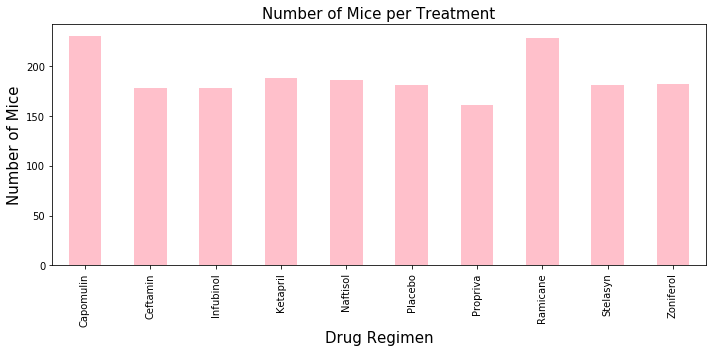

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_count_df = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
mice_count_df

plot_pandas = mice_count_df.plot.bar(figsize=(10,5), color='pink',fontsize = 10)
mice_count_df

plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice",fontsize = 15)
plt.title("Number of Mice per Treatment",fontsize = 15)


plt.tight_layout()
plt.show()

mice_count_df

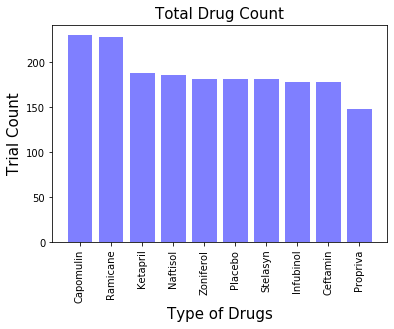

In [31]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_reg = clean_df['Drug Regimen'].value_counts()

y_axis = drug_reg.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_reg.index
                 

plt.bar(x_drugs, y_axis, color='b',alpha=0.5, align='center')
plt.ylabel("Trial Count",fontsize = 15)
plt.xlabel("Type of Drugs",fontsize = 15)
plt.title("Total Drug Count",fontsize = 15)
plt.xticks(rotation=90)

plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84974439e8>],
      dtype=object)

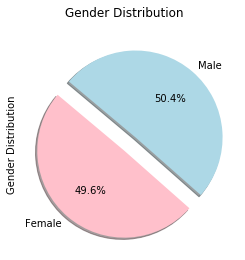

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_df.groupby(['Mouse ID','Sex'])

# Returning the number of elements in groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

#Creating a new dataframe with the count of male and female
mouse_gender = pd.DataFrame(gender_df.groupby(['Sex']).count())
#mouse_gender
column_name = mouse_gender.columns[0]
pie_title = 'Gender Distribution'
explode = (0.1, 0.1)
mouse_gender = mouse_gender.rename(columns={column_name: 'Gender Distribution'})
gender_plot = mouse_gender.plot.pie(y='Gender Distribution',explode = explode,autopct="%0.1f%%",title = pie_title, legend=False, colors = ["pink", "lightblue"],subplots=True,shadow=True, startangle=140)
gender_plot



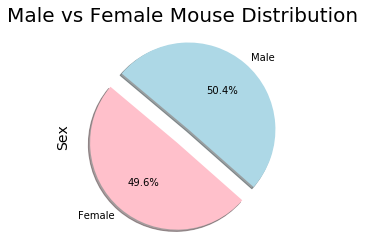

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie,sizes,colors
labels = ["Female","Male"]
sizes = [49.5967741935,50.4032258065]
colors = ['pink', 'lightblue']
explode = (0.1, 0.1)

#Creating the pie chart using the from above.
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_tumor_vol = clean_df.groupby('Mouse ID').max().reset_index()

merge_tumor_vol = max_tumor_vol[['Mouse ID','Timepoint']].merge(clean_df, on=['Mouse ID','Timepoint'],how='left')

merge_tumor_vol.round(2)


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0                 67.97                 2  
1                 65.53                 1  
2                 70.72                 4  
3                 63.00                 3  
4                 63.44                 1  
..                  ...               ...  
243               48.71                 0  
244               30.64                 0  
245               62.75                 3  
246               65.74                 3  
247               73.87                 4  

[248 rows x 8 columns]

In [15]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
capomulin= merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculating the any potential quartiles and outliers of the most promising treatment regimens
                     
#Capmulin

quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap

#Outliers

upper_ocap= upper_cap+(1.5*iqr)
lower_ocap= lower_cap-(1.5*iqr)


# Ramicane Quartile and outlier
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram

# Outliers
upper_oram= upper_ram+(1.5*iqr)
lower_oram= lower_ram-(1.5*iqr)



 #Infubionol quartiles and Outliers
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in = quartile_in[.25]
upper_in = quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)


#Ceftmain quartiles amd Outliers
quartile_cef = ceftamin.quantile([.25,.5,.75])
lower_ceft = quartile_cef[.25]
upper_ceft = quartile_cef[.75]
iqr = upper_ceft-lower_ceft

#Outliers

upper_cef= upper_ceft+(1.5*iqr)
lower_cef= lower_ceft-(1.5*iqr)
                     
# Output for the quartiles and outliers of the most promising treatment regimens

print(f'The upper quartile of Capomulin is {round((upper_cap),2)}')   
print(f'The lower quartile of Capomulin is {round((lower_cap),2)}')
print(f'The interquartile of Capomulin is {round((iqr),2)}')
print(f'The values above {round((upper_ocap),2)} is the outlier')
print(f'The values below {round((lower_ocap),2)} is the outlier')  

print(f'/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*\n')

print(f'The upper quartile of Ramicane is {round((upper_ram),2)}')   
print(f'The lower quartile of Ramicane is {round((lower_ram),2)}')
print(f'The interquartile of Ramicane is {round((iqr),2)}')
print(f'The values above {round((upper_oram),2)} is the outlier')
print(f'The values below {round((lower_oram),2)} is the outlier\n') 

print(f'/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*\n')

print(f'The upper quartile of Infubionol is {round((upper_in),2)}')   
print(f'The lower quartile of Infubionol is {round((lower_in),2)}')
print(f'The interquartile of Infubionol is {round((iqr),2)}')
print(f'The values above {round((upper_oin),2)} is the outlier')
print(f'The values below {round((lower_oin),2)} is the outlier') 

print(f'/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*\n')

print(f'The upper quartile of Ceftmain is {round((upper_ceft),2)}')   
print(f'The lower quartile of Ceftmain is {round((lower_ceft),2)}')
print(f'The interquartile of Ceftmain is {round((iqr),2)}')
print(f'The values above {round((upper_cef),2)} is the outlier')
print(f'The values below {round((lower_cef),2)} is the outlier\n') 





The upper quartile of Capomulin is 40.16
The lower quartile of Capomulin is 32.38
The interquartile of Capomulin is 15.58
The values above 51.83 is the outlier
The values below 20.7 is the outlier
/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*

The upper quartile of Ramicane is 40.66
The lower quartile of Ramicane is 31.56
The interquartile of Ramicane is 15.58
The values above 54.31 is the outlier
The values below 17.91 is the outlier

/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*

The upper quartile of Infubionol is 65.53
The lower quartile of Infubionol is 54.05
The interquartile of Infubionol is 15.58
The values above 82.74 is the outlier
The values below 36.83 is the outlier
/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*

The upper quartile of Ceftmain is 64.3
The lower quartile of Ceftmain is 48.72
The interquartile of Ceftmain is 15.58
The values above 87.67 is the outlier
The values below 25.36 is the outlier



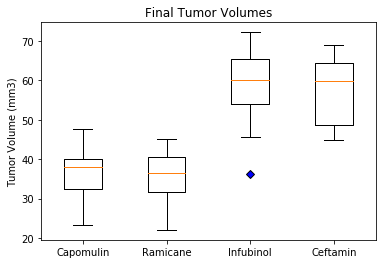

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

blue_diamond = dict(markerfacecolor='b', marker='D')

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=blue_diamond)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

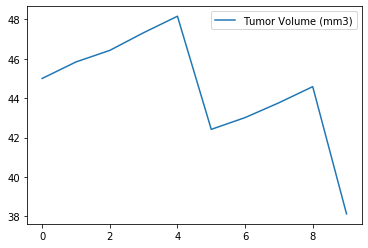

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_time_df = combined_df[combined_df['Mouse ID'].isin(['j119'])]
tumor_time_df

new_tumor_time_df = tumor_time_df[['Mouse ID','Tumor Volume (mm3)']]
line_plot_df = new_tumor_time_df.reset_index()
line_plot_final = line_plot_df[["Mouse ID",  "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


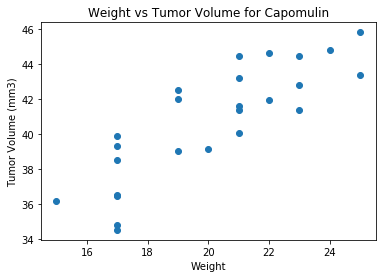

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_average = cap_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

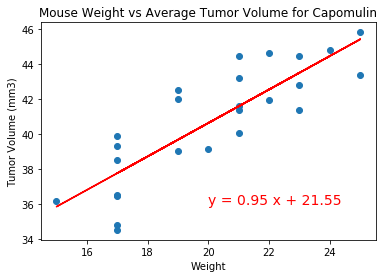

Correlation between these two variables is 0.84


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"])
regress_values = cap_average["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"] )
plt.plot(cap_average["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show()
print(f"Correlation between these two variables is {round(rvalue,2)}")


In [ ]:
# observations and Insights

#1. There is a positive correlation between Mouse Weight vs Average Tumor Volume for Capomulin
#2. Capomuline and Ramicane have a higher success rate in drug trials.
#3. The number of male mice is slightly higher than female mice. The drug trials were higher in male.
